In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [3]:
# Load the dataset
emissions_data = pd.read_csv('emissions_by_country.csv')

# Data analysis details
print(emissions_data.info())
print(emissions_data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               61087 non-null  object 
 1   ISO 3166-1 alpha-3    59483 non-null  object 
 2   Year                  62307 non-null  float64
 3   Total                 62381 non-null  float64
 4   Temperature           63104 non-null  int64  
 5   GDP Per Capita (USD)  63104 non-null  int64  
 6   Coal                  21797 non-null  float64
 7   Oil                   21774 non-null  float64
 8   Gas                   21717 non-null  float64
 9   Cement                20488 non-null  float64
 10  Flaring               21338 non-null  float64
 11  Other                 2685 non-null   float64
 12  Per Capita            19392 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 6.3+ MB
None
               Year         Total   Temperature  GDP Per Ca

In [4]:
# Data preprocessing
# Handling missing values
for col in emissions_data.columns:
    if emissions_data[col].dtype in [np.float64, np.int64]:
        emissions_data[col].fillna(emissions_data[col].mean(), inplace=True)
    else:
        emissions_data[col].fillna(emissions_data[col].mode()[0], inplace=True)



In [5]:
# Selecting relevant features and target variable
features = ['Year', 'Temperature', 'GDP Per Capita (USD)']
X = emissions_data[features]
y = emissions_data['Total']

# Normalize data
X = (X - X.mean()) / X.std()



In [6]:
# Adding a bias term (column of ones) to X
X['bias'] = 1

def custom_train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Custom train-test split function to avoid using sklearn.
    """
    if random_state:
        np.random.seed(random_state)
    
    # Shuffle the indices
    shuffled_indices = np.random.permutation(len(X))
    
    # Determine the size of the test set
    test_set_size = int(len(X) * test_size)
    
    # Split the indices
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]



In [7]:
# Splitting data using custom function
X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")



X_train shape: (50484, 4)
y_train shape: (50484,)
X_test shape: (12620, 4)
y_test shape: (12620,)


In [8]:
# Calculating weights using OLS
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Making predictions
y_pred_train = X_train.dot(w)
y_pred_test = X_test.dot(w)



In [9]:
# Calculating MSE
mse_train = np.mean((y_train - y_pred_train) ** 2)
mse_test = np.mean((y_test - y_pred_test) ** 2)

print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")



Training MSE: 791206.408693899
Test MSE: 344323.9606382573


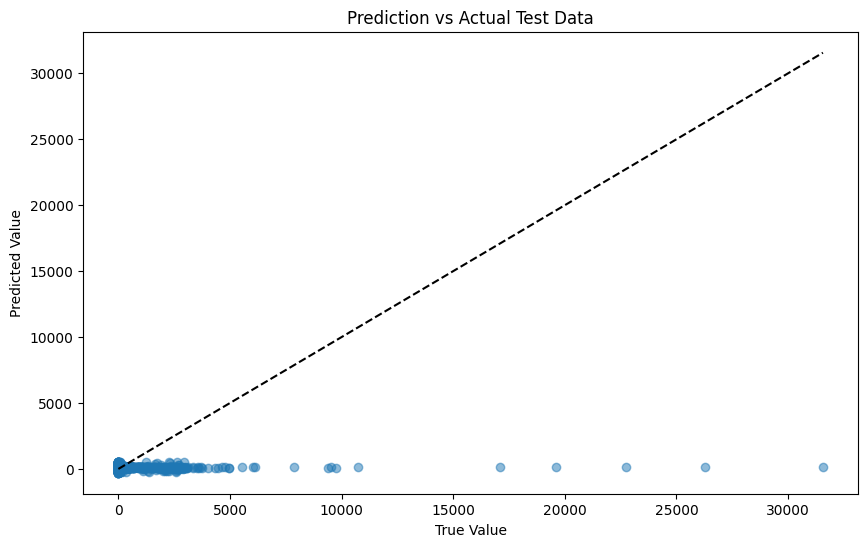

In [10]:
# Plotting the predictions vs actual targets for OLS
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Prediction vs Actual Test Data')
plt.show()



In [11]:
# Ridge Regression

# Setting a lambda (regularization) value
lambda_val = 0.1

# Constructing the identity matrix
identity_matrix = np.identity(X_train.shape[1])



In [12]:
# Calculating weights using OLS for Ridge Regression
w_ridge = np.linalg.inv(X_train.T.dot(X_train) + lambda_val * identity_matrix).dot(X_train.T).dot(y_train)

# Making predictions using the Ridge Regression model
y_pred_train_ridge = X_train.dot(w_ridge)
y_pred_test_ridge = X_test.dot(w_ridge)



In [13]:
# Calculating MSE for Ridge Regression
mse_train_ridge = np.mean((y_train - y_pred_train_ridge) ** 2)
mse_test_ridge = np.mean((y_test - y_pred_test_ridge) ** 2)

print(f"Training MSE (Ridge): {mse_train_ridge}")
print(f"Test MSE (Ridge): {mse_test_ridge}")



Training MSE (Ridge): 791206.4086939328
Test MSE (Ridge): 344323.95116526296


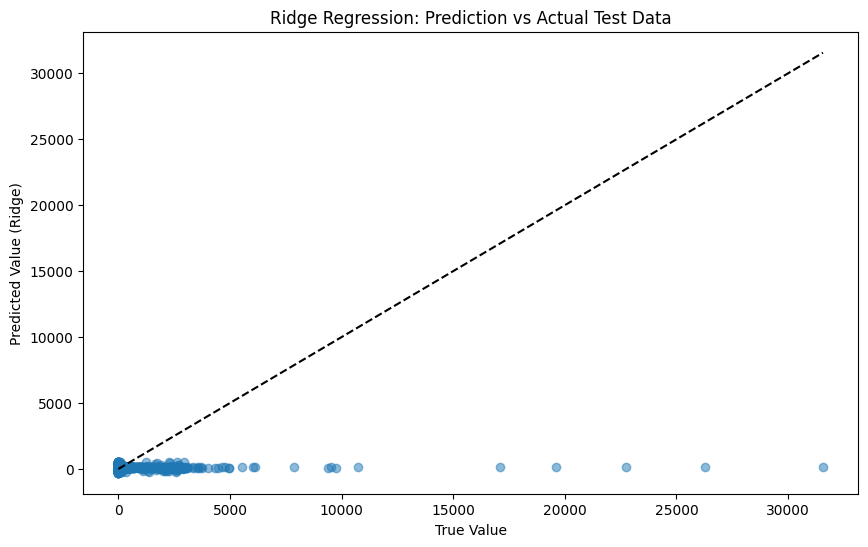

In [14]:
# Plotting the Ridge Regression predictions vs actual targets
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_ridge, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel('True Value')
plt.ylabel('Predicted Value (Ridge)')
plt.title('Ridge Regression: Prediction vs Actual Test Data')
plt.show()


In [15]:


# Save weights for OLS model to a Pickle file
with open('ols_weights.pkl', 'wb') as file:
    pickle.dump(w, file)

# Save weights for Ridge Regression model to a Pickle file
with open('ridge_weights.pkl', 'wb') as file:
    pickle.dump(w_ridge, file)

print("Model weights saved successfully!")


Model weights saved successfully!
